In [1]:
import pandas as pd 
import numpy as np
#import math

In [2]:
X_train = pd.read_csv('X_train.csv', index_col = 0)
X_train = X_train.reset_index(drop = True)
X_train = X_train.drop(['index', 'item_type', 'country_code', 'currency', 'inAlbum', 'genre', 'tags', 'day',
                       'coded_country_code', 'coded_currency', 'coded_genre', 'coded_tags'], axis = 1)
X_train.head()

,item_price,numTracks,albumRelease,BC_friday,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,...,tags_spokenword,tags_techno,tags_unitedkingdom,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,4.69,9.0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.18,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3.00,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.00,8.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.00,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
X_valid = pd.read_csv('X_valid.csv', index_col = 0)
X_valid = X_valid.reset_index(drop = True)
X_valid = X_valid.drop(['index', 'item_type', 'country_code', 'currency', 'inAlbum', 'genre', 'tags', 'day',
                       'coded_country_code', 'coded_currency', 'coded_genre', 'coded_tags'], axis = 1)
X_valid.head()

,item_price,numTracks,albumRelease,BC_friday,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,...,tags_spokenword,tags_techno,tags_unitedkingdom,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,1.78,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2.00,2.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9.00,10.0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,6.00,5.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5.15,4.0,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
X_test = pd.read_csv('X_test.csv', index_col = 0)
X_test = X_test.reset_index(drop = True)
X_test = X_test.drop(['index', 'item_type', 'country_code', 'currency', 'inAlbum', 'genre', 'tags', 'day',
                       'coded_country_code', 'coded_currency', 'coded_genre', 'coded_tags'], axis = 1)
X_test.head()

,item_price,numTracks,albumRelease,BC_friday,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,...,tags_spokenword,tags_techno,tags_unitedkingdom,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,5.00,4.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.75,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.00,1.0,2,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2.25,1.0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.00,10.0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
X_train = pd.concat([X_train, X_valid])

In [7]:
y_train = pd.read_csv('y_train.csv', index_col = 0)
y_train = y_train.reset_index(drop = True)

y_train = y_train['amount_paid_usd']

In [8]:
y_valid = pd.read_csv('y_valid.csv', index_col = 0)
y_valid = y_valid.reset_index(drop = True)

y_valid = y_valid['amount_paid_usd']

In [9]:
y_test = pd.read_csv('y_test.csv', index_col = 0)
y_test = y_test.reset_index(drop = True)

y_test = y_test['amount_paid_usd']

In [10]:
y_train = pd.concat([y_train, y_valid])

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((530840, 266), (132711, 266), (530840,), (132711,))

In [12]:
#standardize numerical columns: (value - mean) / std
dfs = [X_train, X_test]
num_cols = ['item_price', 'numTracks', 'albumRelease']

for data in dfs:
    for x in num_cols:
        data[x] = (data[x] - np.mean(data[x])) / np.std(data[x])

#### random forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [16]:
rfr = RandomForestRegressor(random_state = 42)

In [17]:
parameters = {'n_estimators' : np.array([25, 50, 100]),
              'min_samples_split': np.array([1, 5, 10]),
              'max_features':np.array([0.3, 0.5, 0.8])}

In [18]:
hyp_search = GridSearchCV(estimator = rfr, 
                          param_grid = parameters, 
                          cv = 5, 
                         verbose = 10,
                         scoring = 'neg_root_mean_squared_error')

In [20]:
%%time
hyp_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START max_features=0.3, min_samples_split=1, n_estimators=25.....
[CV 1/5; 1/27] END max_features=0.3, min_samples_split=1, n_estimators=25;, score=-4.103 total time= 1.6min
[CV 2/5; 1/27] START max_features=0.3, min_samples_split=1, n_estimators=25.....
[CV 2/5; 1/27] END max_features=0.3, min_samples_split=1, n_estimators=25;, score=-3.903 total time= 1.5min
[CV 3/5; 1/27] START max_features=0.3, min_samples_split=1, n_estimators=25.....
[CV 3/5; 1/27] END max_features=0.3, min_samples_split=1, n_estimators=25;, score=-3.995 total time= 1.5min
[CV 4/5; 1/27] START max_features=0.3, min_samples_split=1, n_estimators=25.....
[CV 4/5; 1/27] END max_features=0.3, min_samples_split=1, n_estimators=25;, score=-3.860 total time= 1.5min
[CV 5/5; 1/27] START max_features=0.3, min_samples_split=1, n_estimators=25.....
[CV 5/5; 1/27] END max_features=0.3, min_samples_split=1, n_estimators=25;, score=-3.737 total time= 

[CV 4/5; 9/27] END max_features=0.3, min_samples_split=10, n_estimators=100;, score=-3.692 total time= 5.6min
[CV 5/5; 9/27] START max_features=0.3, min_samples_split=10, n_estimators=100...
[CV 5/5; 9/27] END max_features=0.3, min_samples_split=10, n_estimators=100;, score=-3.581 total time= 5.6min
[CV 1/5; 10/27] START max_features=0.5, min_samples_split=1, n_estimators=25....
[CV 1/5; 10/27] END max_features=0.5, min_samples_split=1, n_estimators=25;, score=-4.115 total time= 2.2min
[CV 2/5; 10/27] START max_features=0.5, min_samples_split=1, n_estimators=25....
[CV 2/5; 10/27] END max_features=0.5, min_samples_split=1, n_estimators=25;, score=-3.920 total time= 2.2min
[CV 3/5; 10/27] START max_features=0.5, min_samples_split=1, n_estimators=25....
[CV 3/5; 10/27] END max_features=0.5, min_samples_split=1, n_estimators=25;, score=-3.986 total time= 2.2min
[CV 4/5; 10/27] START max_features=0.5, min_samples_split=1, n_estimators=25....
[CV 4/5; 10/27] END max_features=0.5, min_sample

[CV 2/5; 18/27] END max_features=0.5, min_samples_split=10, n_estimators=100;, score=-3.770 total time= 8.7min
[CV 3/5; 18/27] START max_features=0.5, min_samples_split=10, n_estimators=100..
[CV 3/5; 18/27] END max_features=0.5, min_samples_split=10, n_estimators=100;, score=-3.827 total time= 8.7min
[CV 4/5; 18/27] START max_features=0.5, min_samples_split=10, n_estimators=100..
[CV 4/5; 18/27] END max_features=0.5, min_samples_split=10, n_estimators=100;, score=-3.692 total time= 8.6min
[CV 5/5; 18/27] START max_features=0.5, min_samples_split=10, n_estimators=100..
[CV 5/5; 18/27] END max_features=0.5, min_samples_split=10, n_estimators=100;, score=-3.586 total time= 8.7min
[CV 1/5; 19/27] START max_features=0.8, min_samples_split=1, n_estimators=25....
[CV 1/5; 19/27] END max_features=0.8, min_samples_split=1, n_estimators=25;, score=-4.158 total time= 3.5min
[CV 2/5; 19/27] START max_features=0.8, min_samples_split=1, n_estimators=25....
[CV 2/5; 19/27] END max_features=0.8, min_

[CV 5/5; 26/27] END max_features=0.8, min_samples_split=10, n_estimators=50;, score=-3.612 total time= 6.8min
[CV 1/5; 27/27] START max_features=0.8, min_samples_split=10, n_estimators=100..
[CV 1/5; 27/27] END max_features=0.8, min_samples_split=10, n_estimators=100;, score=-3.959 total time=13.6min
[CV 2/5; 27/27] START max_features=0.8, min_samples_split=10, n_estimators=100..
[CV 2/5; 27/27] END max_features=0.8, min_samples_split=10, n_estimators=100;, score=-3.790 total time=13.7min
[CV 3/5; 27/27] START max_features=0.8, min_samples_split=10, n_estimators=100..
[CV 3/5; 27/27] END max_features=0.8, min_samples_split=10, n_estimators=100;, score=-3.841 total time=13.8min
[CV 4/5; 27/27] START max_features=0.8, min_samples_split=10, n_estimators=100..
[CV 4/5; 27/27] END max_features=0.8, min_samples_split=10, n_estimators=100;, score=-3.717 total time=13.7min
[CV 5/5; 27/27] START max_features=0.8, min_samples_split=10, n_estimators=100..
[CV 5/5; 27/27] END max_features=0.8, min

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': array([0.3, 0.5, 0.8]),
                         'min_samples_split': array([ 1,  5, 10]),
                         'n_estimators': array([ 25,  50, 100])},
             scoring='neg_root_mean_squared_error', verbose=10)

In [22]:
print(hyp_search.best_params_)
print(hyp_search.best_score_)

{'max_features': 0.3, 'min_samples_split': 10, 'n_estimators': 100}
-3.7576138152928826


In [23]:
hyp_search.best_estimator_

RandomForestRegressor(max_features=0.3, min_samples_split=10, random_state=42)

In [24]:
hyp_search.best_index_

8

In [26]:
## Retrain with the choses hyperparameters: max_features = 0.3, min_samples_split = 5, n_estimators = 100
rfr = RandomForestRegressor(random_state = 42, n_estimators = 100, min_samples_split = 5, max_features = 0.3)

In [27]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_features=0.3, min_samples_split=5, random_state=42)

In [28]:
pred = rfr.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt

In [33]:
print('RMSE on test data:', sqrt(mse(y_test, pred)))
print('MAE on test data:', mae(y_test, pred))

RMSE on test data: 3.9621195362346735
MAE on test data: 1.31448329362119


In [34]:
error_df = pd.DataFrame()
error_df['true'] = y_test
error_df['predicted'] = pred

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

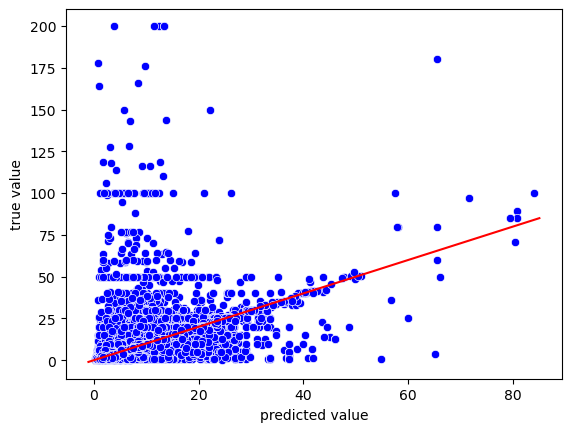

In [38]:
errors = sns.scatterplot(data = error_df, x = 'predicted', y = 'true', color = 'b')
#plt.axhline(y = 0, color = 'r')
plt.plot([-1, 85], [-1, 85], c = 'r')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.savefig('RF_errors.png')